In [5]:
# Analisando a proporção entre Homens e Mulheres
male = (df['Gender'] == 'Male').sum()    
female =(df['Gender'] == 'Female').sum()
print('Male   : {} ({}%)\nFemale : {} ({}%)'. \
     format(male,round(((male/(male+female))*100),2),female,round(((female/(male+female))*100),2)))

Male   : 206089 (54.08%)
Female : 175020 (45.92%)


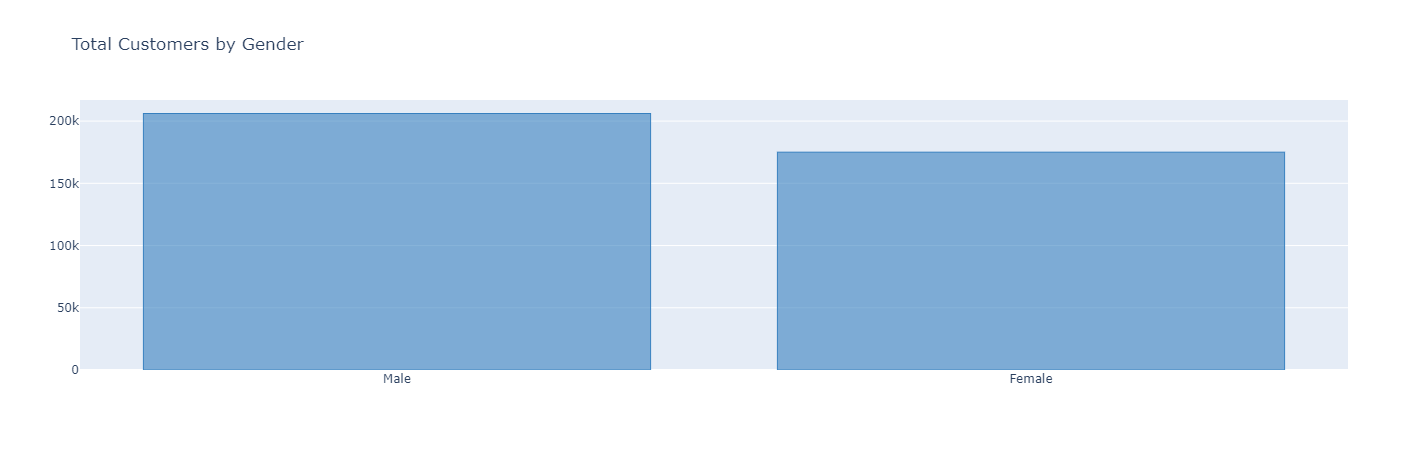

In [6]:
df['Gender'].value_counts().iplot(kind='bar',color='blue',
                                 layout=go.Layout(title='Total Customers by Gender',autosize=False,width=600))

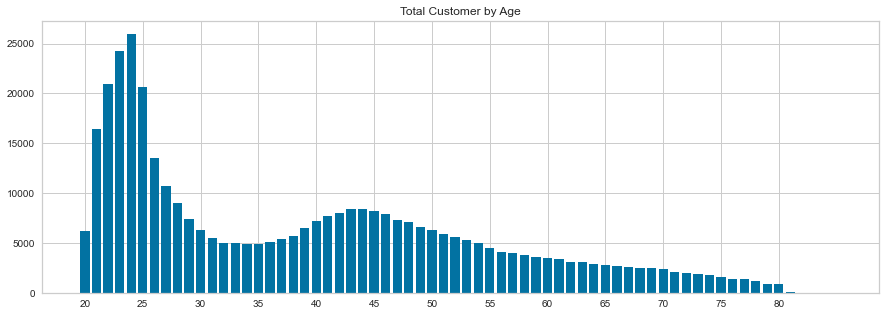

In [7]:
# Analisando a distribuição de clientes por Idade

df_age = pd.DataFrame(df['Age'].value_counts().reset_index().sort_values('index'))

plt.figure(figsize = (15,5))
plt.xticks(range(20,85,5))
plt.title('Total Customer by Age')
plt.bar(df_age['index'],df_age['Age'])
plt.show()



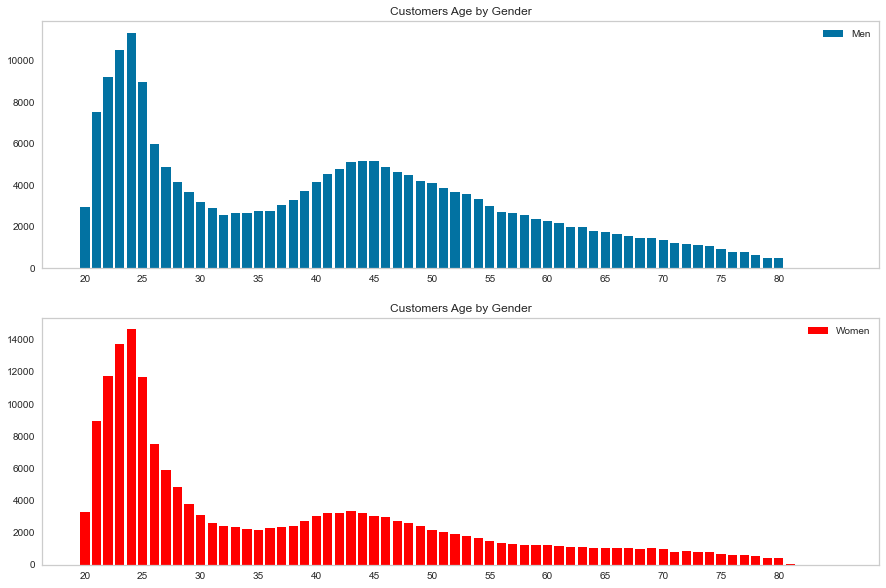

In [8]:
# Analisando a distribuição de clientes por idade e gênero
male_ages = pd.DataFrame(df[df['Gender']=='Male']['Age'].value_counts().reset_index().sort_values('index'))
female_ages =pd.DataFrame(df[df['Gender'] =='Female']['Age'].value_counts().reset_index().sort_values('index'))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.title('Customers Age by Gender')
plt.xticks(range(20,85,5))
plt.bar(male_ages['index'],male_ages['Age'],label ='Men')
plt.grid()
plt.legend()

plt.subplot(2,1,2)
plt.title('Customers Age by Gender')
plt.xticks(range(20,85,5))
plt.bar(female_ages['index'],female_ages['Age'],color='Red',label ='Women')
plt.grid()
plt.legend()
plt.show()

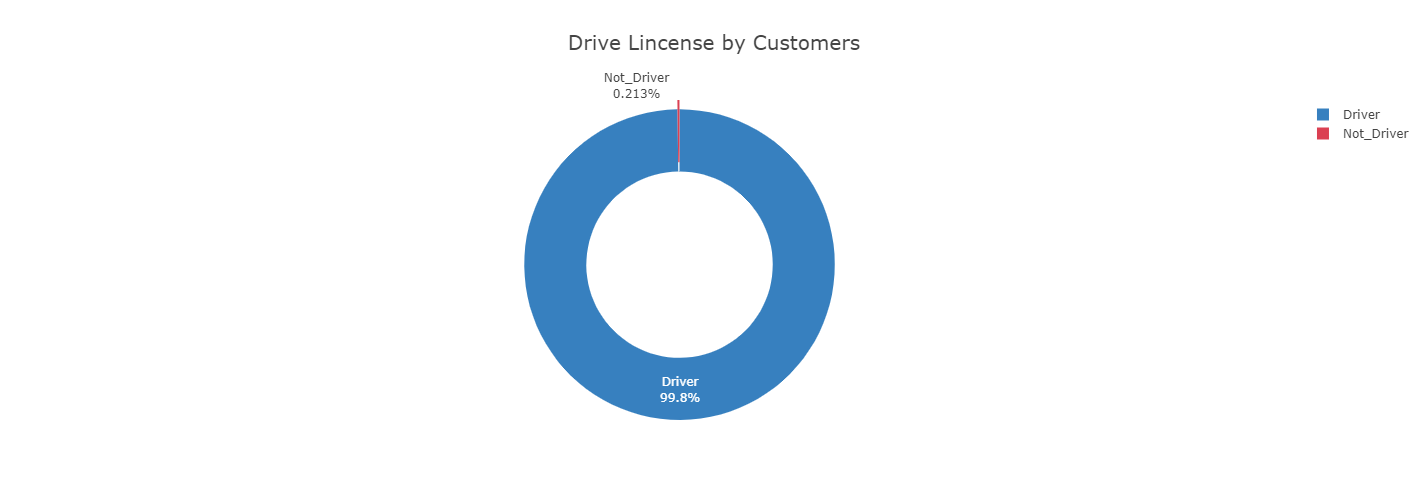

In [9]:
# Total de clientes com Carteira de Habilitação
new_index = pd.DataFrame(['Not_Driver','Driver'],columns = ['Status'])


temp = df['Driving_License'].value_counts().to_frame()
temp = pd.concat([new_index,temp],axis=1)

layout = cf.Layout(title = 'Drive Lincense by Customers',titlefont=dict(size = 20),
                  xaxis = dict(title =''),yaxis=dict(title =''),autosize = False,width = 500,height = 500
                  )

temp.iplot(kind = 'pie',hole = 0.6,pull =0.03,textinfo ='label+percent',
          colors = ['Red','Blue'],
          values ='Driving_License',labels = 'Status',
           layout = layout)


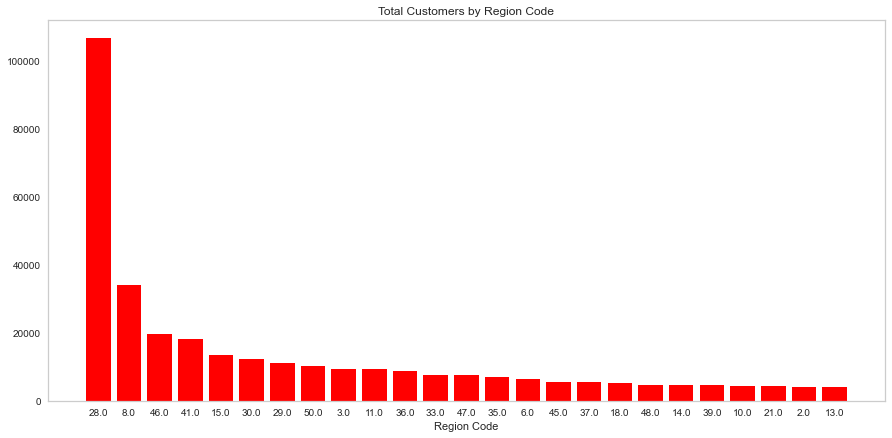

In [10]:
# Distribuição de clientios por Region Code
temp = df['Region_Code'].value_counts().to_frame().reset_index().nlargest(25,'Region_Code')

list_codes = []
for i in temp['index']:
    i =str(i)
    list_codes.append(i)

plt.figure(figsize =(15,7))    
plt.title('Total Customers by Region Code')    
plt.xlabel('Region Code')
plt.grid()
plt.bar(list_codes,temp['Region_Code'],color = 'red')
plt.show()

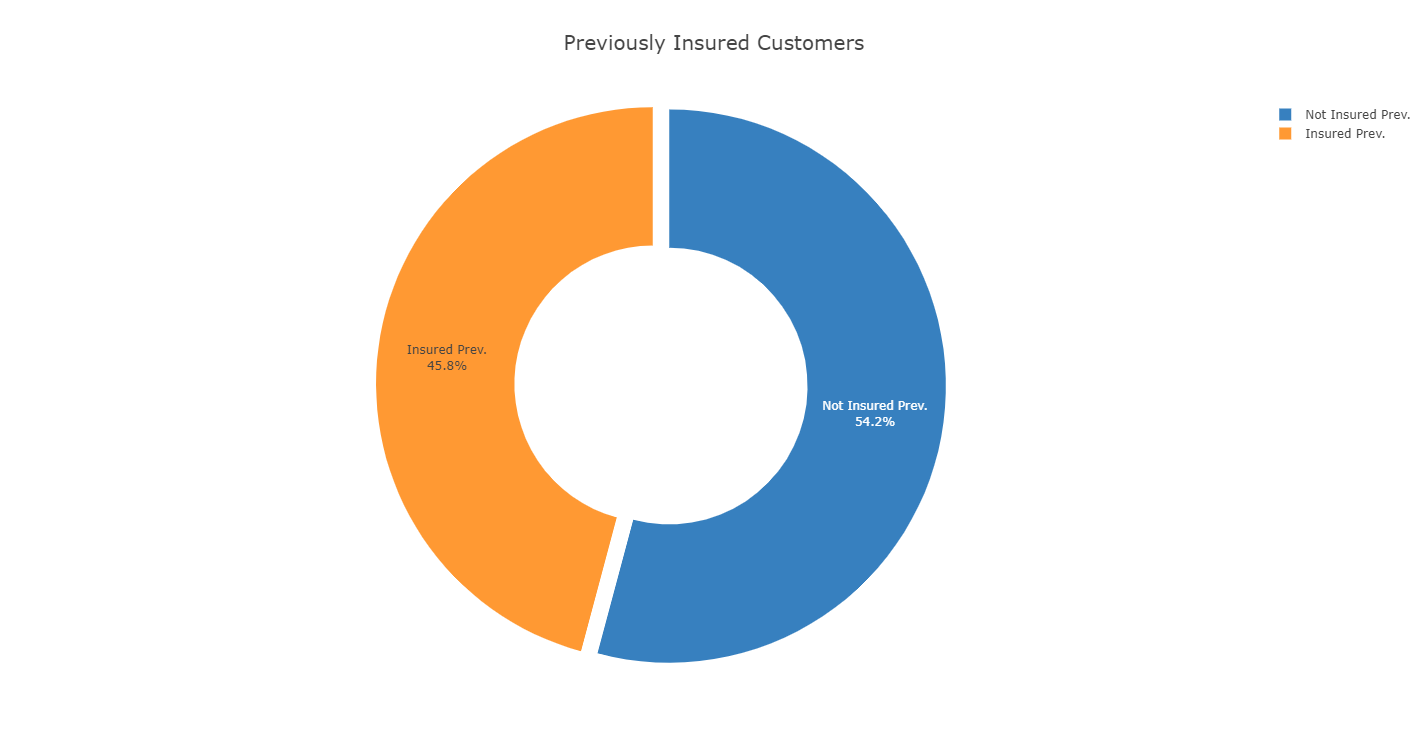

In [11]:
# Total de Clientes que ja aderiram a algum seguro de veículo 
new_index = pd.DataFrame(['Not Insured Prev.','Insured Prev.'],columns=['status'])

temp = df['Previously_Insured'].value_counts().to_frame()
temp = pd.concat((temp,new_index),axis=1)

layout = cf.Layout(title='Previously Insured Customers',titlefont=dict(size = 20),
                  xaxis=dict(title=''),yaxis=dict(title=''),autosize=False,width=750,height=750)

temp.iplot(kind='pie',hole = 0.5,pull = 0.03,
          textinfo='label+percent',values='Previously_Insured',colors=['Blue','Orange'],
          labels='status',
          layout = layout)



< 1 Year : 164786 (43.24%)
1-2 Year : 200316 (52.56%)
> 2 Years : 16007(4.2%)


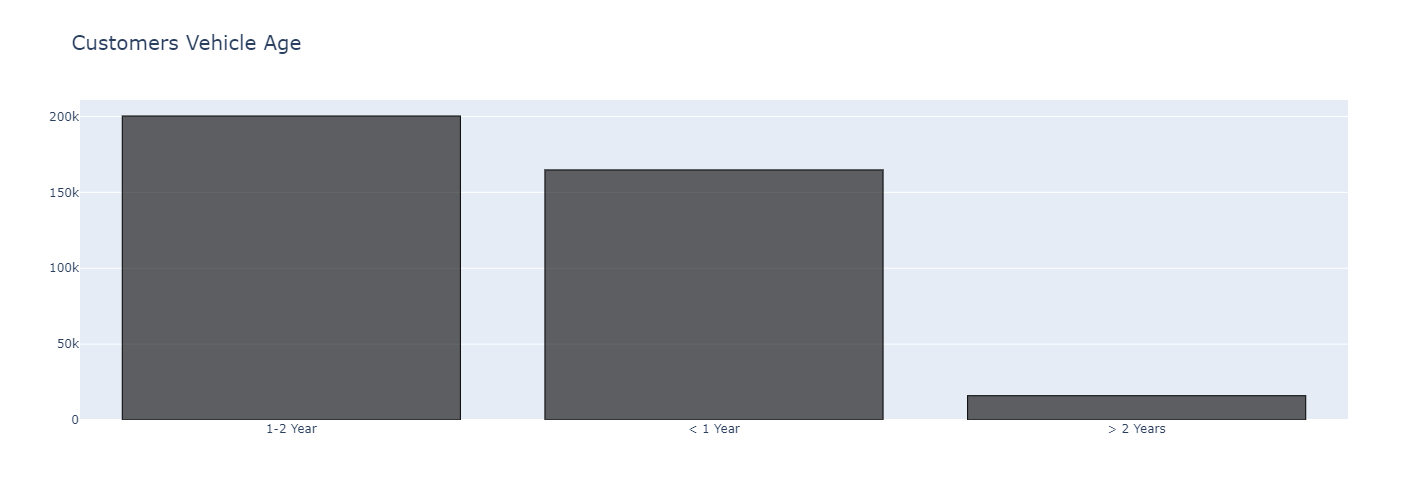

200316

In [12]:
# Tempo de uso dos veículos
temp = df['Vehicle_Age'].value_counts().reset_index()

menor_1 = (df['Vehicle_Age']== '< 1 Year').sum()
entre_1_2 = (df['Vehicle_Age'] == '1-2 Year').sum()
maior_2 = (df['Vehicle_Age'] == '> 2 Years').sum()

print('< 1 Year : {} ({}%)\n1-2 Year : {} ({}%)\n> 2 Years : {}({}%)'. \
     format(menor_1,round(((menor_1/(menor_1+entre_1_2+maior_2))*100),2),
            entre_1_2,round(((entre_1_2/(menor_1+entre_1_2+maior_2))*100),2),
            maior_2,round(((maior_2/(menor_1+entre_1_2+maior_2))*100),2)))



df['Vehicle_Age'].value_counts().iplot(kind='bar',color='black',
                                      layout=go.Layout(title='Customers Vehicle Age',titlefont=dict(size=20),
                                                      autosize=False,width=700,height=500))
entre_1_2

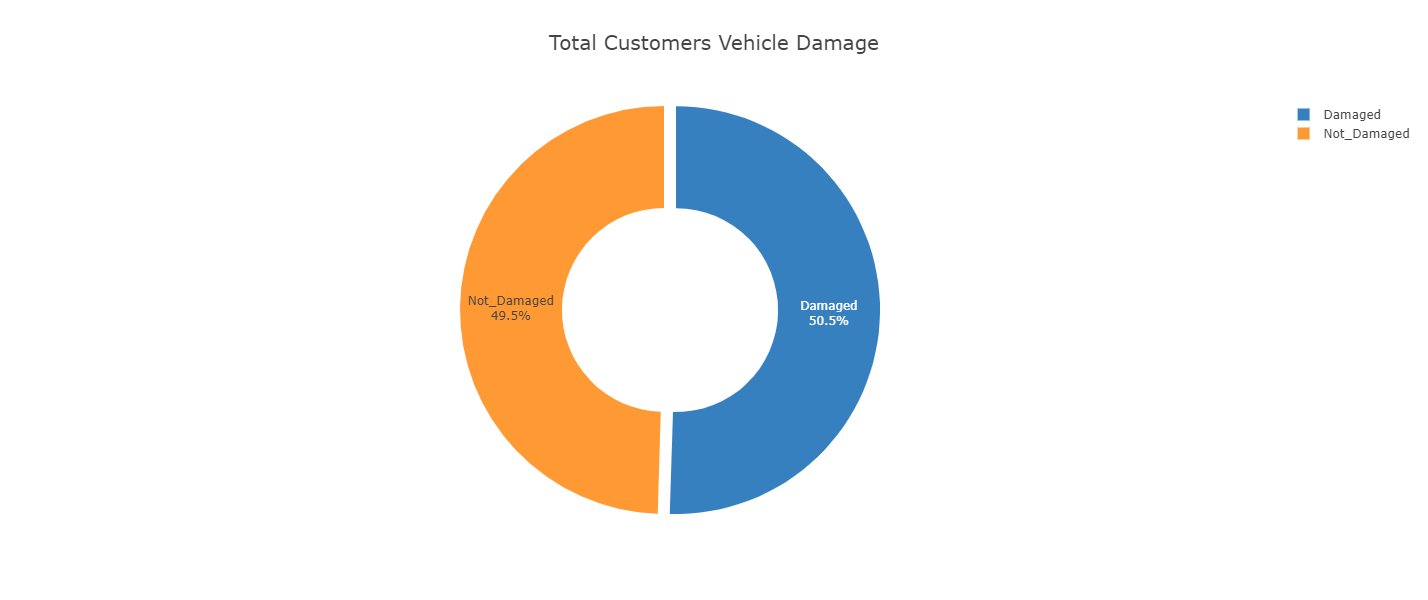

In [13]:
# Verificando quantos clientes ja danificaram os carros
new_index = pd.DataFrame(['Damaged','Not_Damaged'],columns=['status'])

temp =df['Vehicle_Damage'].value_counts().to_frame().reset_index()
temp = pd.concat((temp,new_index),axis=1)

layout = cf.Layout(title ='Total Customers Vehicle Damage',titlefont=dict(size=20),
                  xaxis=dict(title=''),yaxis=dict(title=''),
                  autosize = False,width = 600, height= 600)

temp.iplot(kind='pie',hole = 0.5,pull=0.03,colors=['Blue','Orange'],
           textinfo='label+percent',values ='Vehicle_Damage',labels='status',
           layout=layout)

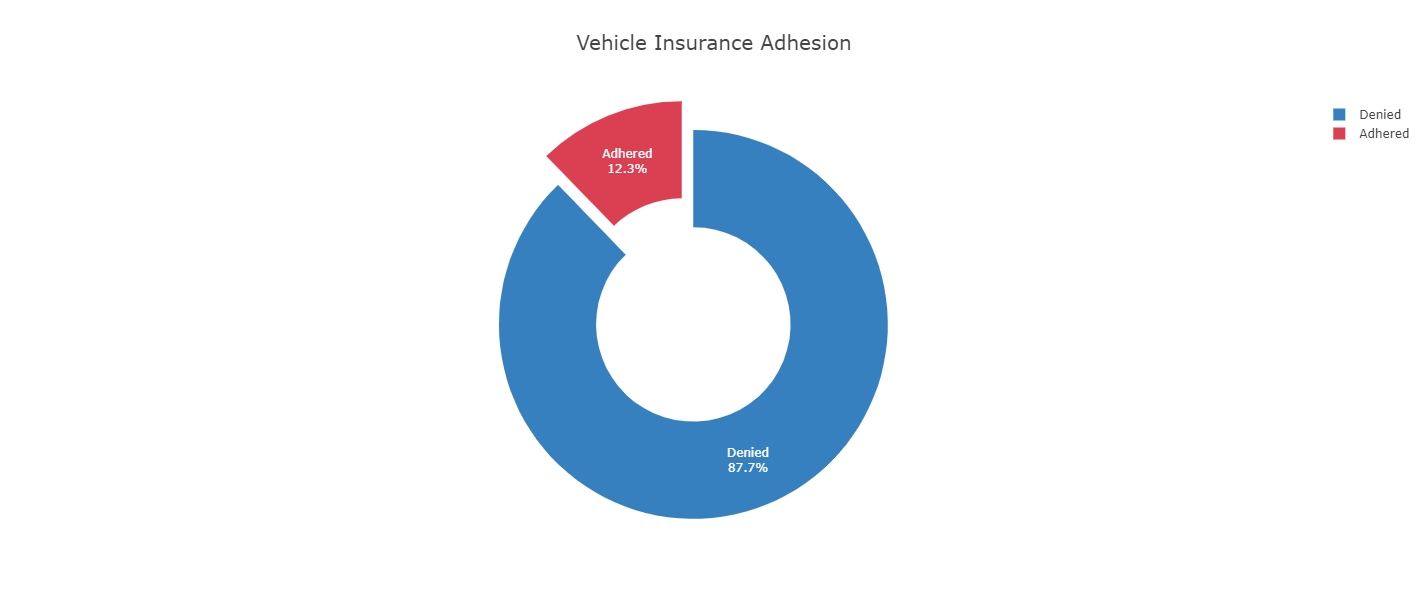

In [15]:
# Total de clientes que aderiram ao plano de seguros cruzados 
new_index = pd.DataFrame(['Denied','Adhered'],columns=['status'])

temp = df['Response'].value_counts().to_frame()
temp =pd.concat([new_index,temp],axis=1)

layout = cf.Layout(title ='Vehicle Insurance Adhesion',titlefont=dict(size=20),
                  xaxis=dict(title=''),yaxis=dict(title=''),
                  autosize = False,width = 600, height= 600)

temp.iplot(kind='pie',hole = 0.5,pull=0.08,colors=['Blue','Red'],
           textinfo='label+percent',values ='Response',labels='status',
           layout=layout)





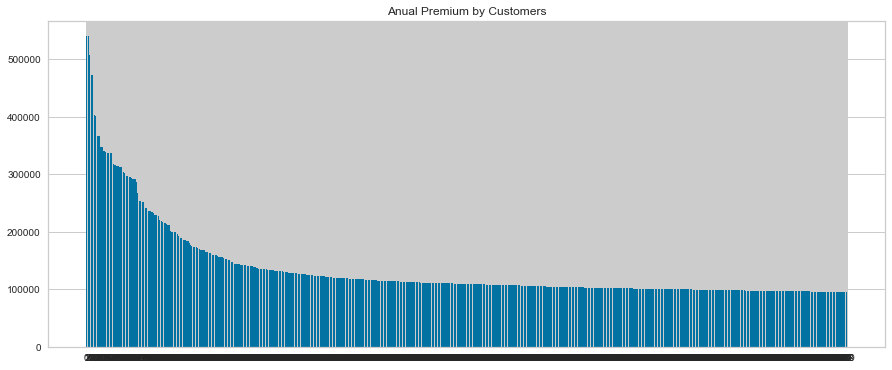

In [16]:
# Hisograma da quantidade paga anualmente por clientes
temp = pd.DataFrame(df['Annual_Premium'].values,columns=['values'])
temp = temp.nlargest(1000,'values')

plt.figure(figsize=(15,6))
plt.title('Anual Premium by Customers')
plt.xticks(range(0,1000,1))
plt.bar(range(1000),temp['values'])

plt.show()

<BarContainer object of 15 artists>

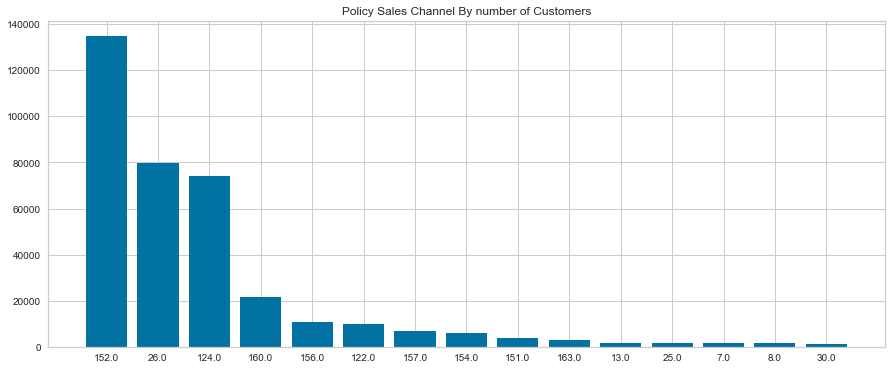

In [37]:
# Quantidade de Clientes por politica de Pagamento
temp =df['Policy_Sales_Channel'].value_counts().to_frame().nlargest(15,'Policy_Sales_Channel').reset_index()

list_codes=[]
for i in temp['index']:
    i = str(i)
    list_codes.append(i)

plt.figure(figsize=(15,6))
plt.title('Policy Sales Channel By number of Customers')
plt.grid(True)
plt.bar(list_codes,temp['Policy_Sales_Channel'])    